<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Histograms and PDFs</h1>
### Notebook contributed by Leo Siqueira
### Edited by Kayla Besong 
### Last Modified 02/13/18


<div style="clear:both"></div>
</div>

<hr style="height:2px;">


In [44]:
import matplotlib as mpl
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from pylab import rcParams, pcolor, show,colorbar, xticks, yticks, title, figure
import netCDF4

# Data read in:


-> Data was downloaded as a .grb file and opened using PyNio package

-> Spatial Subsetting was performed in IDV to trim to lat (0-85N) and lon (120, -120)




In [50]:
#data read in 

stfn = netCDF4.Dataset('/Users/kaylabesong/IDV_files/MNTSF1.nc')
PV = netCDF4.Dataset('/Users/kaylabesong/IDV_files/PV1.nc')

#explore variables

print(PV.variables.keys())
print(stfn.variables.keys())



odict_keys(['Potential_vorticity_isentrope', 'reftime', 'time', 'isentrope', 'lat', 'lon'])
odict_keys(['Montgomery_stream_function_isentrope', 'reftime', 'time', 'isentrope', 'lat', 'lon'])


# Prepare Basic Scatterplot

In [51]:
# Define a figure: scatterplot. 

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
rcParams['figure.figsize'] = (11, 6.5)

def fig5():
    fig,ax=plt.subplots(1,1)
    ax.plot(x,y,'.')
    ax.set_xlabel('Montgomery Streamfunction');ax.set_ylabel('Potential Vorticity')
    

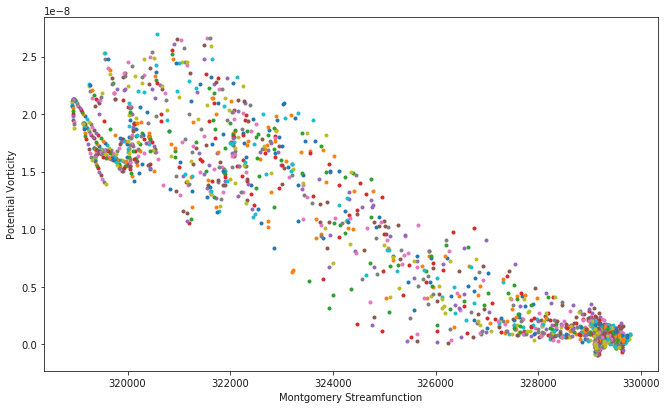

In [52]:
#subset data according to variable over time

x = stfn.variables['Montgomery_stream_function_isentrope'][0][0]
y = PV.variables['Potential_vorticity_isentrope'][0][0]

# PLOT IT
fig5()

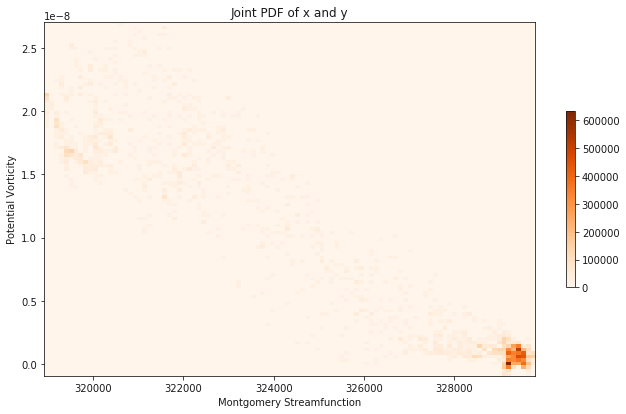

In [48]:
import matplotlib.cm as cm  # import the colormaps.
fig,ax=plt.subplots(1,1)    # Create a result-shaped container (a fig)

x1 = []
y1 = []

for i in x:
    for k in i:
        x1.append(k)
for j in y:
    for l in j:
        y1.append(l)

# Make the 2D histogram with 100 bins

(n,xx,yy,im)=ax.hist2d(x1,y1,bins=100,cmap=cm.Oranges,cmin=0.,normed=True)

# Plot it, with a colorbar
plt.colorbar(im,shrink=0.5)
ax.set_xlabel('Montgomery Streamfunction'); ax.set_ylabel('Potential Vorticity')
ax.set_title('Joint PDF of x and y')
plt.show()

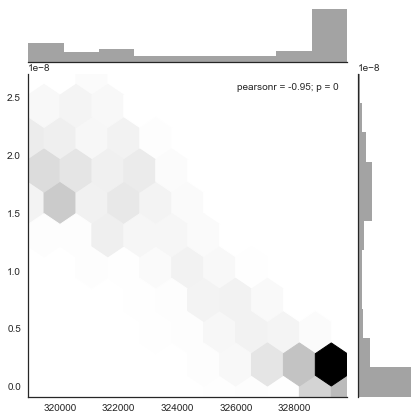

In [49]:
# Do it in Seaborn, with the marginal distributions on the top and side
import seaborn as sns
sns.set(color_codes=True)

df = pd.DataFrame({'x': x1, 'y': y1})
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Back to science:

There appears to be a negative trend between potential vorticity and the montgomery streamfunction. 


